In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
df = pd.read_csv("ex1data2.txt", names=['size', 'bedrooms', 'value'])
df.head()

,size,bedrooms,value
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


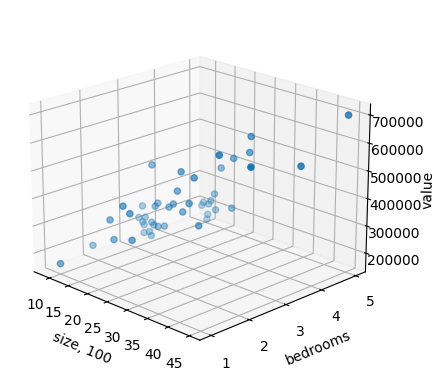

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['size']/100, df['bedrooms'], df['value'])
ax.set_xlabel("size, 100")
ax.set_ylabel("bedrooms")
ax.set_zlabel("value")
ax.view_init(20, -45)

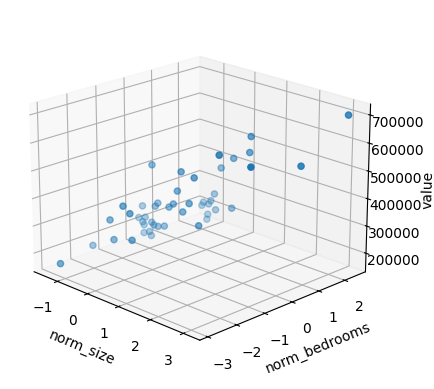

In [35]:
#x = [df['size'].values, df['bedrooms'].values]
x = df[['size', 'bedrooms']].values
y = df['value'].values
theta = np.array([0., 0.])
#print(np.mean(x, axis=0))

def h(theta, x):
    return theta[0] + theta[1]*x[0]+theta[2]*x[1]

def normalize(x):
  std_fixed = np.zeros_like(np.std(x, axis=0))
  std_fixed[np.std(x, axis=0) == 0] = 1
  std_fixed += np.std(x, axis=0)
  return (x - np.mean(x, axis=0))/std_fixed, np.mean(x, axis=0), np.std(x, axis=0)

x, mean, std = normalize(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], df['value'])
ax.set_xlabel("norm_size")
ax.set_ylabel("norm_bedrooms")
ax.set_zlabel("value")
ax.view_init(20, -45)

In [37]:
def loss_func(theta, x, y):
    temp = 0
    for i in range(x.shape[0]):
        temp += (h(theta, x[i]) - y[i])**2
    return 1/(2*y.size) * temp

In [38]:
def grad_desc(loss_func, h, theta, x, y, a):
    loss_values = [loss_func(theta, x, y)]
    last_l = loss_func(theta, x, y) + 10
    while(np.abs(loss_func(theta, x, y) - last_l).all()>1e-5):
        last_l = loss_func(theta, x, y)
        loss_values.append(last_l)
        z0, z1, z2 = 0, 0, 0
        for i in range(y.shape[0]):
            z0 += h(theta, x[i]) - y[i]
            z1 += (h(theta, x[i]) - y[i])*x[i][0]
            z2 += (h(theta, x[i]) -y[i])*x[i][1]
        temp0 = a/x.shape[0] * z0
        temp1 = a/x.shape[0] * z1
        temp2 = a/x.shape[0] * z2
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
        theta[2] = theta[2] - temp2
    return theta, loss_values

Text(0, 0.5, 'loss function value')

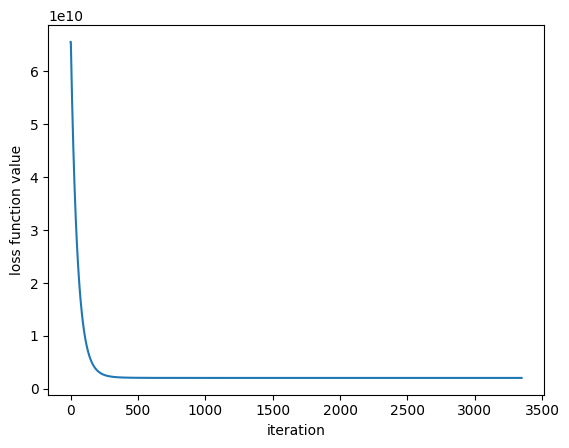

In [39]:
theta = [0., 0., 0.]
theta, loss_values = grad_desc(loss_func, h, theta, x, y, 0.01)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function value")

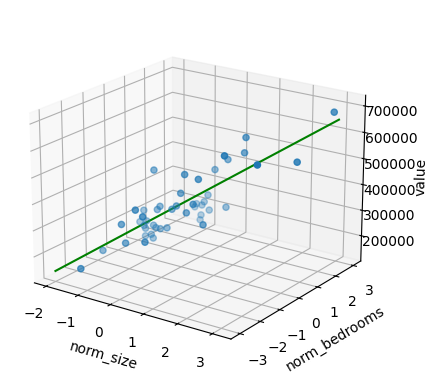

In [41]:
x_pred = np.zeros(x.shape)
x_pred[:,0]=np.linspace(-2,3, x.shape[0])
x_pred[:,1]=np.linspace(-3,3, x.shape[0])
y_pred = np.zeros(y.shape)
for i in range(y_pred.shape[0]):
    y_pred[i] = h(theta, x_pred[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_pred[:,0], x_pred[:,1], y_pred, color='green')
ax.scatter(x[:,0], x[:,1], df['value'])
ax.set_xlabel("norm_size")
ax.set_ylabel("norm_bedrooms")
ax.set_zlabel("value")
ax.view_init(20, -55)


In [43]:
size0_norm = (1500 - mean[0])/std[0]
bedrooms0_norm = (3 - mean[1])/std[1]
print(f"Для дома площадью {1500} квадратных футов с 3 спальнями прогнозируемая цена равна {h(theta, [size0_norm, bedrooms0_norm]) : .0f}$")

Для дома площадью 1500 квадратных футов с 3 спальнями прогнозируемая цена равна  272200$


In [45]:
x_matrix = np.zeros((x.shape[0], 3))
x_matrix[:, 0] = 1
x_matrix[:, 1] = x[:, 0]
x_matrix[:, 2] = x[:, 1]

theta_normal_eq = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)
print("Coeffitients from normal equation",theta_normal_eq)
print("Coeffitients form gradient descent",theta)
print("Normal equation loss function",loss_func(theta_normal_eq, x, y))
print("Gradient descent loss function",loss_func(theta, x, y))

Coeffitients from normal equation [340412.65957447 109447.79646964  -6578.35485416]
Coeffitients form gradient descent [340412.65957446524, 109447.77401781209, -6578.332402331525]
Normal equation loss function 2043280050.6028285
Gradient descent loss function 2043280050.603051
